In [276]:
#%pip install pmdarima

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [278]:
df = pd.read_csv('./Data/GBIMEfinal.csv')

In [279]:
df.isnull().sum()

Unnamed: 0    0
t             0
c             0
o             0
h             0
l             0
v             0
dtype: int64

In [280]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [281]:
df['t'] = pd.to_datetime(df['t']).dt.date
df

,t,c,o,h,l,v
0,2012-09-09,46.052427,46.052427,46.052427,42.894547,50
1,2012-09-10,50.526092,46.052427,50.526092,46.841898,254
2,2012-09-11,55.526070,50.526092,55.526070,51.315562,376
3,2012-09-12,61.052361,55.526070,61.052361,56.578697,1131
4,2012-09-13,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
1992,2023-05-07,183.000000,187.000000,187.000000,183.000000,49157
1993,2023-05-08,181.500000,186.000000,186.000000,180.200000,70629
1994,2023-05-09,183.200000,184.900000,184.900000,180.400000,59202
1995,2023-05-10,183.200000,185.000000,185.000000,182.200000,30993


In [282]:
df = df.set_index('t')
df = df[['c']].copy()
df


,c
t,
2012-09-09,46.052427
2012-09-10,50.526092
2012-09-11,55.526070
2012-09-12,61.052361
2012-09-13,67.104966
...,...
2023-05-07,183.000000
2023-05-08,181.500000
2023-05-09,183.200000


In [283]:
# df.index


<Axes: xlabel='t'>

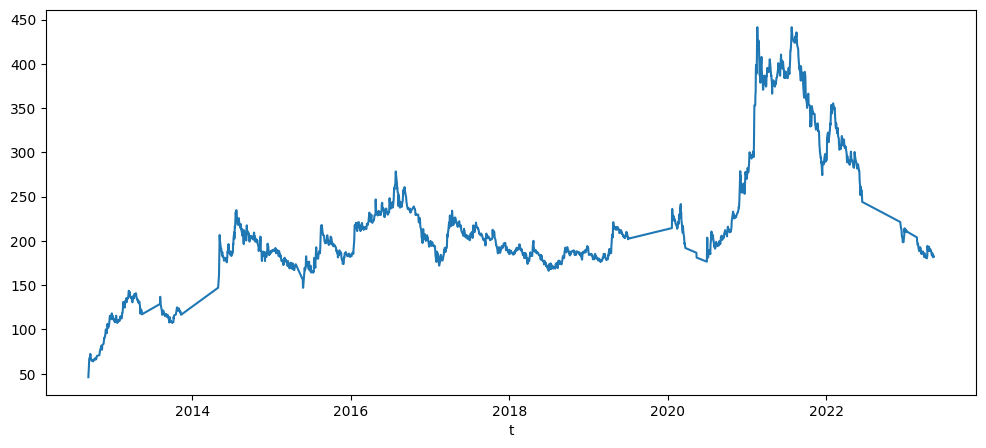

In [284]:
df['c'].plot(figsize=(12,5))

In [285]:
from pmdarima.arima import ndiffs
kpss_diff = ndiffs(df['c'].values, alpha=0.05, test='kpss', max_d=12)
adf_diff = ndiffs(df['c'].values, alpha=0.05, test='adf', max_d=12)
n_diffs = max(adf_diff , kpss_diff )
n_diffs

1

In [286]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("1. ADF :",dftest[0])
    print("2. P-Value :",dftest[1])
    print("3. Number of Lag :",dftest[2])
    print("4. Number of Observations Used for ADF Regression and Critical Values Calcualtion :",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key," :",val)

In [287]:
ad_test(df['c'])

1. ADF : -2.291983140502449
2. P-Value : 0.17456660617484832
3. Number of Lag : 14
4. Number of Observations Used for ADF Regression and Critical Values Calcualtion : 1982
5. Critical Values :
	 1%  : -3.4336536273681078
	 5%  : -2.862999357426174
	 10%  : -2.567546900734257


In [288]:
# from statsmodels.graphics.tsaplots import plot_acf

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# ax1.plot(df.c)
# ax1.set_title('Original')
# #add ; at the end of the plot functions so thatr plot is not duplicated
# plot_acf(df.c,ax=ax2);

In [289]:
# diff = df.c.diff().dropna()

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# ax1.plot(diff)
# ax1.set_title("Difference once")
# plot_acf(diff,ax=ax2);


In [290]:
# diff = df.c.diff().diff().dropna()

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# ax1.plot(diff)
# ax1.set_title("Difference twice")
# plot_acf(diff,ax=ax2);


In [291]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.c,test='adf')

1

In [292]:
# from statsmodels.graphics.tsaplots import plot_pacf
# diff = df.c.diff().diff().dropna()

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# ax1.plot(diff)
# ax1.set_title("Difference once")
# ax2.set_ylim(0,1)
# plot_pacf(diff,ax=ax2);

In [293]:
# diff = df.c.diff().diff().dropna()

# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# ax1.plot(diff)
# ax1.set_title("Difference twice")
# ax2.set_ylim(0,1)
# plot_acf(diff,ax=ax2);

In [294]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11626.688, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11651.585, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11634.675, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11632.351, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11650.049, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11626.846, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11626.826, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11617.609, Time=2.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11626.804, Time=0.90 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11618.751, Time=3.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11625.751, Time=4.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11616.587, Time=5.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11627.459, Time=1.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=11618.819, Time=6.34 sec
 ARIMA(1,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1997
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -5801.490
Date:                Mon, 12 Jun 2023   AIC                          11614.980
Time:                        23:35:47   BIC                          11648.573
Sample:                             0   HQIC                         11627.316
                               - 1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8673      0.034    -25.181      0.000      -0.935      -0.800
ar.L2         -0.9222      0.031    -29.429      0.000      -0.984      -0.861
ma.L1          0.9785      0.036     26.849      0.000       0.907       1.050
ma.L2          0.9870      0.039     25.149      0.000       0.910       1.064
ma.L3          0.1104      0.017      6.600      0.000       0.078       0.143
sigma2        19.5929      0.302     64.843      0.000      19.001      20.185
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4315.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [295]:
from statsmodels.tsa.arima.model import ARIMA

In [296]:
import math
training_data_len = math.ceil(len(df)*0.8)
training_data_len

1598

In [310]:
train = df.iloc[0:training_data_len,:]
test =df.iloc[training_data_len:,:]

In [311]:
model = ARIMA(train['c'], order=(2,1,3))
# model = ARIMA(train['c'], order=(5,0,0))
model = model.fit()
model.summary()

c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      c   No. Observations:                 1598
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -4418.201
Date:                Mon, 12 Jun 2023   AIC                           8848.402
Time:                        23:39:23   BIC                           8880.658
Sample:                             0   HQIC                          8860.381
                               - 1598                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8924      0.098     -9.104      0.000      -1.085      -0.700
ar.L2         -0.8386      0.083    -10.105      0.000      -1.001      -0.676
ma.L1          0.9706      0.100      9.687      0.000       0.774       1.167
ma.L2          0.8709      0.093      9.376      0.000       0.689       1.053
ma.L3          0.0742      0.020      3.700      0.000       0.035       0.113
sigma2        14.8071      0.240     61.765      0.000      14.337      15.277
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4553.32
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             1.23
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [315]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
# print(pred)
pred.index =df.index[start:end+1]
print(pred)

t
2021-02-03    337.486518
2021-02-04    336.801577
2021-02-07    338.427484
2021-02-08    337.550875
2021-02-09    336.969684
                 ...    
2023-05-07    337.607243
2023-05-08    337.607243
2023-05-09    337.607243
2023-05-10    337.607243
2023-05-11    337.607243
Name: predicted_mean, Length: 399, dtype: float64


c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='t'>

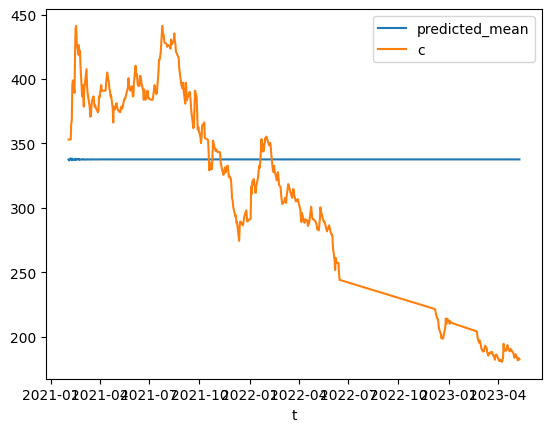

In [313]:
pred.plot(legend=True)
test['c'].plot(legend=True)


In [301]:
test['c'].mean()

322.7449869156562

In [302]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['c']))
rmse

6.243873501488167

In [303]:
model2 = ARIMA(df,order=(2,1,3))
model2 = model2.fit()
df.tail()

c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,c
t,
2023-05-07,183.0
2023-05-08,181.5
2023-05-09,183.2
2023-05-10,183.2
2023-05-11,182.3


In [304]:
index_future_dates = pd.date_range(start='2023-05-11' ,end='2023-06-10')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2023-05-11    182.609118
2023-05-12    182.386649
2023-05-13    182.204769
2023-05-14    182.567684
2023-05-15    182.420649
2023-05-16    182.213490
2023-05-17    182.528764
2023-05-18    182.446363
2023-05-19    182.227081
2023-05-20    182.493263
2023-05-21    182.464621
2023-05-22    182.243985
2023-05-23    182.461764
2023-05-24    182.476351
2023-05-25    182.262860
2023-05-26    182.434575
2023-05-27    182.482527
2023-05-28    182.282578
2023-05-29    182.411778
2023-05-30    182.484115
2023-05-31    182.302224
2023-06-01    182.393273
2023-06-02    182.482046
2023-06-03    182.321084
2023-06-04    182.378823
2023-06-05    182.477187
2023-06-06    182.338625
2023-06-07    182.368091
2023-06-08    182.470318
2023-06-09    182.354479
2023-06-10    182.360674
Freq: D, Name: ARIMA Predictions, dtype: float64


c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

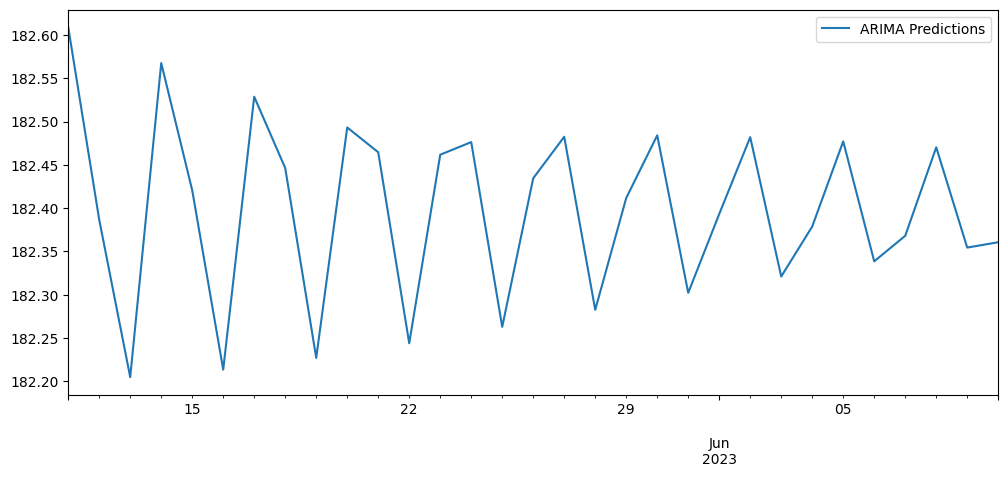

In [305]:
pred.plot(figsize=(12,5),legend=True)